<a href="https://colab.research.google.com/github/MUHAMMAD-BILAL-S/CODSOFT_TASK_4/blob/main/Codsoft_Task_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

First few rows of the dataset:
     v1                                                 v2 Unnamed: 2  \
0   ham  Go until jurong point, crazy.. Available only ...        NaN   
1   ham                      Ok lar... Joking wif u oni...        NaN   
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...        NaN   
3   ham  U dun say so early hor... U c already then say...        NaN   
4   ham  Nah I don't think he goes to usf, he lives aro...        NaN   

  Unnamed: 3 Unnamed: 4  
0        NaN        NaN  
1        NaN        NaN  
2        NaN        NaN  
3        NaN        NaN  
4        NaN        NaN  

Summary statistics of the dataset:
          v1                      v2  \
count   5572                    5572   
unique     2                    5169   
top      ham  Sorry, I'll call later   
freq    4825                      30   

                                               Unnamed: 2  \
count                                                  50   
unique         

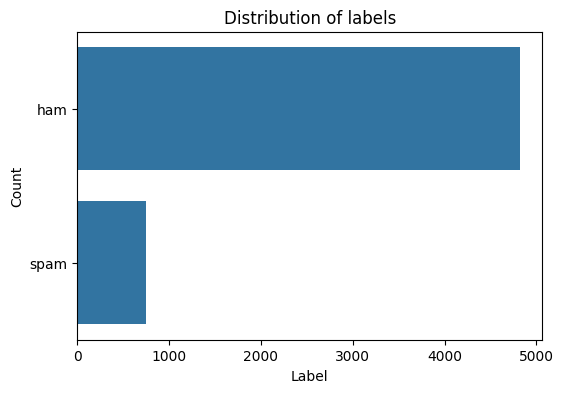

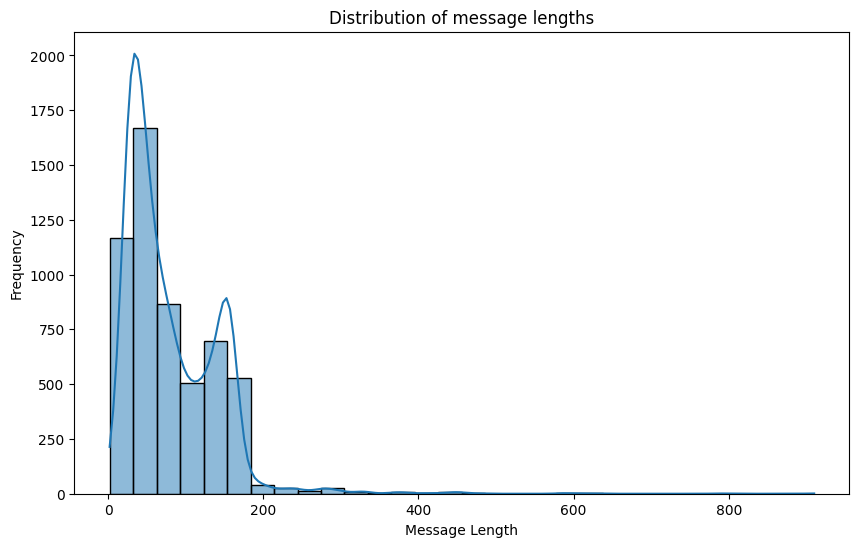


Some examples of spam messages:
2     Free entry in 2 a wkly comp to win FA Cup fina...
5     FreeMsg Hey there darling it's been 3 week's n...
8     WINNER!! As a valued network customer you have...
9     Had your mobile 11 months or more? U R entitle...
11    SIX chances to win CASH! From 100 to 20,000 po...
Name: v2, dtype: object

Some examples of ham messages:
0    Go until jurong point, crazy.. Available only ...
1                        Ok lar... Joking wif u oni...
3    U dun say so early hor... U c already then say...
4    Nah I don't think he goes to usf, he lives aro...
6    Even my brother is not like to speak with me. ...
Name: v2, dtype: object


<ipython-input-6-2086f9b6b6f7>:61: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['label'] = data['label'].map({'ham': 0, 'spam': 1})  # Convert labels to binary (0: ham, 1: spam)


Naive Bayes
Accuracy: 0.9668161434977578
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       965
           1       1.00      0.75      0.86       150

    accuracy                           0.97      1115
   macro avg       0.98      0.88      0.92      1115
weighted avg       0.97      0.97      0.96      1115

Logistic Regression
Accuracy: 0.967713004484305
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       965
           1       0.99      0.77      0.86       150

    accuracy                           0.97      1115
   macro avg       0.98      0.88      0.92      1115
weighted avg       0.97      0.97      0.97      1115

Support Vector Machine
Accuracy: 0.9829596412556054
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       965
           1       0.99      0.89      0.93       150

    accuracy                           0.

In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Load the dataset
data = pd.read_csv(r'/content/spam.csv', encoding='latin-1')

# Display the first few rows of the dataset
print("First few rows of the dataset:")
print(data.head())

# Display summary statistics of the dataset
print("\nSummary statistics of the dataset:")
print(data.describe())

# Check for missing values
print("\nNumber of missing values in each column:")
print(data.isnull().sum())

# Check the distribution of the 'label' column
print("\nDistribution of labels:")
print(data['v1'].value_counts())

# Visualize the distribution of labels
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6, 4))
sns.countplot(data['v1'])
plt.title('Distribution of labels')
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()

# Visualize the distribution of message lengths
data['message_length'] = data['v2'].apply(len)

plt.figure(figsize=(10, 6))
sns.histplot(data['message_length'], bins=30, kde=True)
plt.title('Distribution of message lengths')
plt.xlabel('Message Length')
plt.ylabel('Frequency')
plt.show()

# Display some examples of spam and ham messages
print("\nSome examples of spam messages:")
print(data[data['v1'] == 'spam']['v2'].head())

print("\nSome examples of ham messages:")
print(data[data['v1'] == 'ham']['v2'].head())

# Select relevant columns
data = data[['v1', 'v2']]
data.columns = ['label', 'message']  # Rename columns for better understanding

# Preprocessing
data['label'] = data['label'].map({'ham': 0, 'spam': 1})  # Convert labels to binary (0: ham, 1: spam)

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(data['message'], data['label'], test_size=0.2, random_state=42)

# TF-IDF Vectorization
tfidf_vectorizer = TfidfVectorizer(max_features=5000)  # You can adjust max_features as needed
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Train Naive Bayes classifier
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train_tfidf, y_train)

# Train Logistic Regression classifier
lr_classifier = LogisticRegression()
lr_classifier.fit(X_train_tfidf, y_train)

# Train Support Vector Machine classifier
svm_classifier = SVC(kernel='linear')
svm_classifier.fit(X_train_tfidf, y_train)

# Predictions
nb_predictions = nb_classifier.predict(X_test_tfidf)
lr_predictions = lr_classifier.predict(X_test_tfidf)
svm_predictions = svm_classifier.predict(X_test_tfidf)

# Evaluate the models
def evaluate_model(name, predictions):
    accuracy = accuracy_score(y_test, predictions)
    print(name)
    print("Accuracy:", accuracy)
    print(classification_report(y_test, predictions))

evaluate_model("Naive Bayes", nb_predictions)
evaluate_model("Logistic Regression", lr_predictions)
evaluate_model("Support Vector Machine", svm_predictions)

